# Import stuff

In [430]:
import requests
import time
from bs4 import BeautifulSoup
from six.moves import urllib
import wget
import re

In [110]:
import pandas as pd
import time
import numpy as np
from facebook_business.api import FacebookAdsApi
from facebook_business.adobjects.adaccount import AdAccount
from facebook_business.exceptions import FacebookRequestError
from facebook_business.adobjects.targetingsearch import TargetingSearch
import matplotlib.pyplot as plt
import geopandas
import os

# start API connection
my_app_id = '810388482627359'
my_app_secret = '4f6dd683776b873dd93bf1b84ec27f65'
my_access_token = 'EAALhC0WjFx8BAAgZAKYXSMXiQhImk33a6sEWZAvPuwpEYZAic4kVxMim5vjFg55OTSyVuON4XspmAAtK5bmcTmV98YtlS9717up9ZCe545o2BUq26FbHEWvXlosf47PJjm0BAk0ZCNkZAFLBCTZAWQPsM1cqH8oQasLlMKN3aCGOXUcfq6xL5fd'
FacebookAdsApi.init(my_app_id, my_app_secret, my_access_token)
my_account =  249090325273040
adsaccount=AdAccount('act_249090325273040')

In [135]:
if False:
    f=open('zip_torino.txt','w')
    for z in zip_codes_torino:
        f.write(z+' ')
    f.close()
if False:
    zip_codes_torino=open('zip_torino.txt','r').readlines()[0].split(' ')

# Define the geodataframes we'll work with

In [436]:
df_cap

,CODISTAT,IDCOMUNE,COMUNE,FRAZIONE,CAP,CIVICI,ABITAZIONI,NEGOZI,UFFICI,VERSIONE,geometry
0,01001272,574,TORINO,None,10151,1725,14757,536,544,2009,"POLYGON ((7.625510014772632 45.11358001598873,..."
1,01001272,574,TORINO,None,10155,2249,18125,1078,500,2009,"POLYGON ((7.70531702886528 45.11016816267809, ..."
2,01001272,574,TORINO,None,10154,3004,23625,1424,651,2009,"POLYGON ((7.70531702886528 45.11016816267809, ..."
3,01001272,574,TORINO,None,10152,2414,18875,1429,509,2009,"POLYGON ((7.690760014342415 45.08784998465323,..."
4,01001272,574,TORINO,None,10149,2175,19140,1037,668,2009,"POLYGON ((7.662630013568619 45.10345998476326,..."
5,01001272,574,TORINO,None,10148,1808,9422,554,746,2009,"POLYGON ((7.653330018343588 45.12449998156886,..."
6,01001272,574,TORINO,None,10147,2897,19287,996,323,2009,"POLYGON ((7.690880013578741 45.10374998464141,..."
7,01001272,574,TORINO,None,10146,2395,17343,912,804,2009,"POLYGON ((7.641700014638977 45.08470998470082,..."
8,01001272,574,TORINO,None,10145,966,7710,384,298,2009,"POLYGON ((7.643339078500147 45.07555670217369,..."
9,01001272,574,TORINO,None,10144,1478,14997,982,604,2009,"POLYGON ((7.677755384325471 45.0895161639728, ..."


In [408]:
df_circ = geopandas.read_file('../SHP_files/circoscrizioni_geo/circoscrizioni_geo.shx')
df_cap = geopandas.read_file('../SHP_files/CAP_Torino/CAP_Torino.shp')
df_circ=df_circ.set_index('NCIRCO').sort_index()
df_circ.crs={'init':'epsg:3003'}
df_circ['zip_codes']=[[21,22,23,24,28,29],[35,36,37],[38,39,41,42],[43,44,45,46],[48,47,49,51],[56,54,55],[32,53,52],[33,31,26,25,27,34]]
df_circ.zip_codes=df_circ.zip_codes.apply(lambda x : ['IT:101'+str(e) for e in x])

if False:
    fig,ax=plt.subplots(figsize=(6,6))
    df_circ.plot(ax=ax,color=(0,0,0,0),edgecolor='k')
    df_circ[df_circ.NCIRCO==1].plot(ax=ax,color='pink',edgecolor='k') #21,22,23,24,28,29
    df_circ[df_circ.NCIRCO==2].plot(ax=ax,color='blue',edgecolor='k') #35,36,37
    df_circ[df_circ.NCIRCO==3].plot(ax=ax,color='red',edgecolor='k') #38,39,41,42
    df_circ[df_circ.NCIRCO==4].plot(ax=ax,color='yellow',edgecolor='k') #43,44,45,46
    df_circ[df_circ.NCIRCO==5].plot(ax=ax,color='orange',edgecolor='k') #48,47,49,51
    df_circ[df_circ.NCIRCO==6].plot(ax=ax,color='purple',edgecolor='k') #56,54,55
    df_circ[df_circ.NCIRCO==7].plot(ax=ax,color='green',edgecolor='k') #32,53,52
    df_circ[df_circ.NCIRCO==8].plot(ax=ax,color='gray',edgecolor='k') #33,31,26,25,27,34
    #plt.savefig('CCF_2010.png')

# Facebook API: cheatsheet

In [763]:
# Look for the attributes: They correspond to the 'type' field to fill in below.
#TargetingSearch.TargetingSearchTypes.*
#TargetingSearch.DemographicSearchClasses.*

In [808]:
#How to get a query code

params = {
    # Get the codes for the categories that fit the given class. (e.g all possible interests to target).
    #Possible values of class: interests, behaviors, demographics, life_events, 
    #politics, industries, income, net_worth, home_type, home_ownership, generation, 
    #household_composition, moms, office_type, family_statuses, user_device, user_os
    'type': 'adTargetingCategory',    
    'class': 'interests'
    
#    'type': 'adinterestvalid',
#    'interest_list': ['Musical Theater']
    
    
    }

resp = TargetingSearch.search(params=params)
print(resp)

[<TargetingSearch> {
    "audience_size": 815688610,
    "id": "6002839660079",
    "lifecycle": 2,
    "name": "Cosmetics",
    "path": [
        "Shopping and fashion",
        "Beauty",
        "Cosmetics"
    ],
    "type": "interests"
}, <TargetingSearch> {
    "audience_size": 418730780,
    "id": "6002866718622",
    "lifecycle": 2,
    "name": "Science",
    "path": [
        "Business and industry",
        "Science"
    ],
    "type": "interests"
}, <TargetingSearch> {
    "audience_size": 1138568810,
    "id": "6002867432822",
    "lifecycle": 2,
    "name": "Beauty",
    "path": [
        "Shopping and fashion",
        "Beauty"
    ],
    "type": "interests"
}, <TargetingSearch> {
    "audience_size": 221060168,
    "id": "6002868021822",
    "lifecycle": 2,
    "name": "Adventure travel",
    "path": [
        "Hobbies and activities",
        "Travel",
        "Adventure travel"
    ],
    "type": "interests"
}, <TargetingSearch> {
    "audience_size": 122550814,
    "id

In [812]:
for r in resp:
    if len(r['path'])<2:
        print(r['name'],r['id'])

Shopping and fashion 6003167425934
Entertainment 6003349442621
Fitness and wellness 6003384248805
Technology 6003985771306
Business and industry 6008740787350
Sports and outdoors 6008803895164
Food and drink 6009248606271
Hobbies and activities 6012547807252
Family and relationships 6012684376438


Build a dataframe with the population by age range for each zip code

In [ ]:
age_ranges={}
for i in range(15,61,3):
    age_ranges[(i,min(65,i+5))]=0

df_zip_pop=pd.DataFrame(index=age_ranges.keys(), columns=zip_codes_torino).fillna('')

In [ ]:
FBErr=False
for zip_code in zip_codes_torino:
    for gen in list(age_ranges.keys()):
        while(True):
            targeting_spec = {
                'geo_locations': {
                    'zips': [
                        {
                            'key': 'IT:{}'.format(zip_code),
                        },
                            ],
                                },

                'age_min':gen[0],
                'age_max':gen[1],
                'publisher_platforms':['facebook'],
            }
            params = {
                'optimization_goal':'REACH', #reach as many users as you can
                'targeting_spec':targeting_spec,
            }
            #Get monthly active users.
            try:
                resp = adsaccount.get_delivery_estimate(params=params)
            except FacebookRequestError:
                if not FBErr:
                    print('facebook error', time.ctime())
                FBErr=True
                time.sleep(8)
                continue
            if FBErr==True:
                print('permission reobtained', time.ctime())
            FBErr=False
            age_ranges[gen]=resp[0]['estimate_mau']
            break
    df_zip_pop[zip_code]=age_ranges.values()

facebook error Fri Mar 15 18:19:03 2019
permission reobtained Fri Mar 15 18:23:46 2019
facebook error Fri Mar 15 18:23:47 2019
permission reobtained Fri Mar 15 18:28:54 2019
facebook error Fri Mar 15 18:28:56 2019
permission reobtained Fri Mar 15 18:39:10 2019
facebook error Fri Mar 15 18:39:11 2019
permission reobtained Fri Mar 15 18:49:25 2019
facebook error Fri Mar 15 18:49:26 2019
permission reobtained Fri Mar 15 18:54:42 2019
facebook error Fri Mar 15 18:54:43 2019
permission reobtained Fri Mar 15 18:59:59 2019
facebook error Fri Mar 15 19:00:00 2019
permission reobtained Fri Mar 15 19:05:15 2019
facebook error Fri Mar 15 19:05:17 2019
permission reobtained Fri Mar 15 19:15:32 2019
facebook error Fri Mar 15 19:15:33 2019
permission reobtained Fri Mar 15 19:20:49 2019
facebook error Fri Mar 15 19:20:50 2019
permission reobtained Fri Mar 15 19:26:05 2019
facebook error Fri Mar 15 19:26:07 2019
permission reobtained Fri Mar 15 19:36:22 2019
facebook error Fri Mar 15 19:36:23 2019
per

In [125]:
#df_zip_pop=pd.read_pickle('df_zip_pop.pkl')
#df_zip_pop.to_pickle('df_zip_pop.pkl')

In [529]:
# CENSUS
# df_cap: CAP dataframe with the geometry (and estimations of population from 2009).
# df_census_families : dataframe from the ufficio de statistica with families typologies

# FB
# df_circ_fb : circoscrizione and their geometries (correspondences with ZIPs), and couples with kids (from fb)
# df_zip_fb : ZIP codes and their geometry, single men and women and married couples per zip
# df_zip_pop : pop by age range and by ZIP code

In [ ]:
# done: comparing couples with kids per circoscrizione.
# current step: comparing the age range by ZIP -> df_zip_pop + df_circ + data from census
# next step: compare the single men and women per circ
# next step: extract gender by ZS -> agglomerate by ZS to form ZIPs -> compare with fb

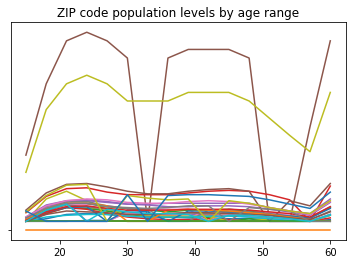

In [574]:
plt.figure()
for col in df_zip_pop:
    plt.plot([e[0] for e in df_zip_pop.index.tolist()], df_zip_pop[col].tolist())
#plt.yscale('log')
plt.title('ZIP code population levels by age range')
plt.show()

# Launch more complicated queries

In [651]:
# define target audience
def set_target(keys):
    '''
    Takes a list of city keys (or a single city key) as argument.
    Ex. : cities = [key1, key2, ...]
    '''
    
    target = dict()
    target['publisher_platforms'] = ['facebook']

    geo = dict()
    l = list()
    if type(keys)==list:
        for k in keys:
            l.append(dict(key=k))
    else:
        l.append(dict(key=keys))
        
    geo['zips'] = l
    geo['location_types'] = ['home']
    target['geo_locations'] = geo
    
    return target

# run query using the target audience as a search specification
def run_query(target, account,debug=False,**kwargs):
    '''
    Takes targeting specifications and account ID as arguments and
    returns daily and monthly estimates.
    '''
    time.sleep(8)
    adsaccount=AdAccount('act_{}'.format(account))
    params={}
    params['optimization_goal'] = 'REACH'
    for key, value in kwargs.items(): 
        target[key]=value 
    params['targeting_spec'] = target
    if debug:
        print(params)
    while(True):
        try:
            resp = adsaccount.get_delivery_estimate(params=params)[0]
        except FacebookRequestError as er:
            print(er.api_error_message())
            print(time.ctime())
            time.sleep(360)
            continue
        except IndexError:
            resp=None
        break
    return resp

In [281]:
"""Array of integers representing relationship status.
1: single 
2: in_relationship
3: married
4: engaged
6: not specified
7: in a civil union
8: in a domestic partnership
9: In an open relationship
10: It's complicated
11: Separated
12: Divorced
13: Widowed
"""

{'optimization_goal': 'REACH', 'targeting_spec': {'publisher_platforms': ['facebook'], 'age_min': 13, 'age_max': 65, 'geo_locations': {'zips': [{'key': 'IT:10121'}], 'location_types': ['home']}, 'relationship_statuses': [1], 'genders': [1], 'Parent (All)': [{'id': '6002714398372', 'name': 'Parents (All)'}]}}

{'optimization_goal': 'REACH',
 'targeting_spec': {'publisher_platforms': ['facebook'],
  'age_min': 13,
  'age_max': 65,
  'geo_locations': {'zips': [{'key': 'IT:10121'}], 'location_types': ['home']},
  'relationship_statuses': [1],
  'genders': [1],
  'Parent (All)': [{'id': '6002714398372', 'name': 'Parents (All)'}]}}

In [603]:
df_circ.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8], dtype='int64', name='NCIRCO')

In [816]:
age_ranges={}
x=5 #Width of agebin
for i in range(15,61,x):
    age_ranges[(i,min(65,i+x))]=0

In [817]:
# By age range/circ?
df_tofill=pd.DataFrame(index=age_ranges.keys(), columns=df_circ.index).fillna('')

In [818]:
#Or by age_range / zip?
df_tofill=pd.DataFrame(index=age_ranges.keys(), columns=zips).fillna('')

In [778]:
#Or by gender?
df_tofill=pd.DataFrame(index=[1,2,3], columns=df_circ.index).fillna('')

In [790]:
#Or by gender / zip?
df_tofill=pd.DataFrame(index=[1,2,3], columns=zips).fillna('')

In [814]:
name_ids=[['Shopping and fashion', '6003167425934'],
['Entertainment', '6003349442621'],
['Fitness and wellness', '6003384248805'],
['Technology', '6003985771306'],
['Business and industry', '6008740787350'],
['Sports and outdoors', '6008803895164'],
['Food and drink', '6009248606271'],
['Hobbies and activities', '6012547807252'],
['Family and relationships', '6012684376438']]

In [ ]:
# Next requests:
# Agglomerate by circ. -> age range v
# Agglomerate by circ. -> gender v
# Agglomerate by circ. -> single people v
# Agglomerate by circ. -> Parents per gender v
# By ZIP -> Married people (all or separating by gender?)

zips=['IT:'+z for z in zip_codes_torino if z]

for name_id in name_ids:
    print(name_id[0])
    df_tofill=pd.DataFrame(index=age_ranges.keys(), columns=df_circ.index).fillna('')
    for agebin in df_tofill.index:
    #for gender in [[1],[2],[3]]:    
        query_results=[]
        for crc,z in enumerate(df_circ.zip_codes):
            tgt=set_target(['IT:'+e for e in z])
            params={}
            #params['relationship_statuses']=[1] #Single people
            #params['education_statuses']=[2,7] #Undergrad and in grad school
            #params['interests']=[{'name':'Theatre', 'id':"6002957026250"}]
    #        params['interests']=[{'name':'Shopping and fashion', 'id':"6003167425934"}]
            params['interests']=[{"name": name_id[0], "id": name_id[1]}]
            tgt['age_min'] = agebin[0]
            tgt['age_max'] = agebin[1]
            #if gender[0] in [1,2]:
            #    params['genders']=gender
            # params['family_statuses']=[{'id':'6002714398372','name':"Parents (All)"}]
            resp=run_query(tgt,my_account,debug=False,**params)
            query_results.append(resp['estimate_mau'])
        print(agebin,'->',query_results)
        df_tofill.loc[agebin]=query_results
    df_tofill.to_pickle('df_circ_agebin_{}.pkl'.format(name_id[0].split(' ')[0]))

Shopping and fashion
(#100) Invalid zip code: 10128, 10129, 10121, 10122, 10123
Thu Mar 28 18:47:40 2019
(#100) Invalid zip code: 10121, 10128, 10122, 10123, 10129
Thu Mar 28 18:53:40 2019
(#100) Invalid zip code: 10122, 10121, 10123, 10128, 10129
Thu Mar 28 18:59:41 2019
(#100) Invalid zip code: 10129, 10128, 10123, 10122, 10121
Thu Mar 28 19:05:41 2019
(#100) Invalid zip code: 10129, 10128, 10123, 10121, 10122
Thu Mar 28 19:11:42 2019
(#100) Invalid zip code: 10129, 10128, 10123, 10122, 10121
Thu Mar 28 19:17:43 2019
(#100) Invalid zip code: 10122, 10123, 10121, 10129, 10128
Thu Mar 28 19:23:43 2019


In [827]:
df_tofill

,NCIRCO,1,2,3,4,5,6,7,8
15,20,2500,1000,9300,2100,3200,2200,2300,3800
20,25,10000,9300,28000,5900,7900,6100,8300,12000
25,30,8900,9700,31000,6900,8800,6400,8400,13000
30,35,6700,8800,27000,6000,8000,5500,6100,11000
35,40,5600,8400,28000,5200,8200,5300,5300,9300
40,45,6000,8700,29000,5500,8200,5200,5400,9600
45,50,5800,8300,27000,5100,7900,5300,4900,9500
50,55,4600,7500,24000,4700,6500,4600,4000,7700
55,60,3500,5800,18000,3800,5600,3400,3300,5700
60,65,5000,8700,26000,4800,8200,5200,4800,9100


In [804]:
df_tofill.to_pickle('df_zip_agebin_business.pkl')

In [ ]:
# FB API counts the requests per slices of 3 hours

In [699]:
[d for d in os.listdir('.') if '.pkl' in d]

['df_zip_pop.pkl',
 'df_circ_agebins.pkl',
 'df_census_families.pkl',
 'df_circ_age_gender.pkl',
 'df_circ_gender.pkl',
 'df_girc_age_gender.pkl',
 'df_circ_fb.pkl',
 'df_zip_fb.pkl',
 'df_circ_parents_gender.pkl',
 'df_circ_marriedparents_gender.pkl',
 'df_circ_gender_census.pkl',
 'df_circ_single.pkl',
 'df_circ_allparents.pkl']

In [787]:
df_tofill.to_pickle('df_.pkl')

In [ ]:
query_re

# Analysis and plots

In [521]:
#df_circ.to_pickle('df_circ_fb.pkl')
#df_zip_fb.to_pickle('df_zip_fb.pkl')
#df_census_families.to_pickle('df_census_families.pkl')

In [ ]:
# current step: comparing the age range by ZIP -> df_zip_pop + df_circ + data from census

In [588]:
df_age_circ=pd.read_pickle('../data_ngh/age_gender_territ/df_age_circ.pkl')
df_age_circ

,Femmine,Maschi,Totale
age,,,
0,2718,2878.0,5596
1,3241,3372.0,6613
2,3222,3367.0,6589
3,3211,3638.0,6849
4,3480,3518.0,6998
5,3392,3648.0,7040
6,3505,3676.0,7181
7,3585,3756.0,7341
8,3563,3837.0,7400


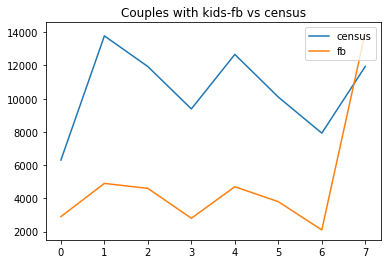

In [579]:
save=False

plt.figure()
plt.plot(df_census_families[[('Coppie' in str(i) and 'con figli' in str(i)) for i in df_census_families.index.tolist()]].sum().tolist()[:-1])
plt.plot(df_circ['couples_wkids'].tolist())
plt.title('Couples with kids-fb vs census')
plt.legend(['census','fb'],loc=1)
if save:
    plt.savefig('CwKids_fb_census.pdf')
plt.show()

# Daniele's work

In [ ]:
# read dataframe
df = pd.read_csv('/home/drama/lagrange_project/data/dataset_comuni_2011.csv', dtype={'code':str,'province':str})

### DATA COLLECTION

# choose 5 reference cities
refcities = df[(df.fb_users>1000)&(df.fb_users<10000)].sample(n=5, axis='index', random_state=9)

refdict = dict()
for ref in refcities.fb_key.values:
    refdict[str(int(ref))] = run_query(set_target(ref), my_account)[1]

# params
ncities = df.shape[0]
#timestamp = int(time.time())
nsave = 100

# run queries
l = list()
for row in df[8000:].itertuples():
    print('Collecting data for', row.name)
    
    d = dict()
    d['code'] = row.code
    d['name'] = row.name
    d['fb_key'] = row.fb_key
    d['population'] = row.population
    
    # get MAUs
    if np.isnan(row.fb_key):
        d['fb_users'] = np.nan
    else:
        mau = run_query(set_target(row.fb_key), my_account)[1]
        if mau == 1000:
            # let's try the exclusion query
            estimates = list()
            for ref in refcities.fb_key.values:
                users = run_query(set_target([row.fb_key, ref]), my_account)[1] - refdict[str(int(ref))]
                # check the result of the query: it may be negative
                if users > 0:
                    estimates.append(users)
                    
            # take the average
            if len(estimates) > 0:
                d['fb_users'] = np.mean(estimates)
            else:
                d['fb_users'] = 0
        else:
            d['fb_users'] = mau
    
    print('%d/%d completed...' % (row.Index+1, ncities))
    l.append(d)
    
    # save data periodically
#    if (row.Index+1)%nsave == 0:
#        print('Saving data collected...')
#        temp = pd.DataFrame(l, columns=['code','name','fb_key','population','fb_users'])
#        temp.to_csv('/home/drama/lagrange_project/data/dataframe_'+str(timestamp)+'.csv', index=False)
        
# save data at the end
temp = pd.DataFrame(l, columns=['code','name','fb_key','population','fb_users'])
temp.to_csv('/home/drama/lagrange_project/data/dataframe_end.csv', index=False)

print('Collection ended successfully!')
#temp = pd.DataFrame(l, columns=['code','name','fb_key','population','fb_users'])

In [109]:
from facebook_business.adobjects.adset import AdSet

adset = AdSet(parent_id='act_249090325273040')
adset.update({
    AdSet.Field.targeting: {
        'geo_locations': {
            'regions': [{'key': '3847'}],
            'cities': [
                {
                    'key': '2430536',
                    'radius': '12',
                    'distance_unit': 'mile',
                },
            ],
        },
        'genders': [1],
        'relationship_statuses': [2, 3, 4],
        'age_min': 18,
        'age_max': 43,
        'interests': [
            {
                'id': 6003139266461,
                'name': 'Movies',
            },
        ],
    },
})
adset.remote_create(params={
    'status': AdSet.Status.active,
})

FacebookRequestError: 

  Message: Call was not successful
  Method:  POST
  Path:    https://graph.facebook.com/v3.2/act_249090325273040/adsets
  Params:  {'status': 'ACTIVE', 'targeting': '{"age_max":43,"age_min":18,"genders":[1],"geo_locations":{"cities":[{"distance_unit":"mile","key":"2430536","radius":"12"}],"regions":[{"key":"3847"}]},"interests":[{"id":6003139266461,"name":"Movies"}],"relationship_statuses":[2,3,4]}'}

  Status:  400
  Response:
    {
      "error": {
        "message": "Invalid parameter",
        "type": "OAuthException",
        "code": 100,
        "error_data": {
          "blame_field_specs": [
            [
              "name"
            ]
          ]
        },
        "error_subcode": 2061015,
        "is_transient": false,
        "error_user_title": "Required Field Is Missing",
        "error_user_msg": "The name field is required. Please complete the field to continue.",
        "fbtrace_id": "GDFLBgefFAW"
      }
    }
